# Bandersnatch Movie Studios


<img src="Images/camera.jpg" alt="camera" width="700" height="500">

### Overview
This project will put into application various aspects of Data science such as Data cleaning , Exploratory Data Analysis , Hypothesis testing , statistics and linear regression .This will enable Bandersnatch Stusios understand the pros and cons of creating a new movie studio and navigate the market to ensure maximum profit on investment. Bandersnatch studios can use this analysis to determine the best categories to venture into, favourable languages to produce movies in, appropriate runtime and suitable markets to penetrate into so as to increase their company's revenue and reach more audiences.

### Business Understanding


### Data Understanding
Box Office(https://www.boxofficemojo.com/)<br>
IMDB(https://www.imdb.com/)<br>
Rotten Tomatoes(https://www.rottentomatoes.com/)<br>
TheMovieDB(https://www.themoviedb.org/) <br>
The Numbers (https://www.the-numbers.com/)

## IMDB's Database structure
IMDB has one of the largest databases of movies available.<br>
Data used here include Tables such as basic movie information (movie_basics), alternative movie titles (movie_akas), 
and movie directors and their respective names (directors & persons).


<img src="Images/db_schema.jpeg" alt="database" width="900" height="500">


### IMPORTS AND DATA

In [223]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import statsmodels as sm
%matplotlib inline

### LOADING AND PREVIEWING  THE DATA

Using pandas we'll open 'tmdb.movies.csv' file and save it in a data frame called  movie_data

In [175]:

movie_data= pd.read_csv("data/tmdb.movies.csv" , index_col=0) 


In [176]:
# Displaying the first rows to ensure the data was loaded well
movie_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


The movie_data contains data about a movie and shows the language of initial production ,the date of the release of the movie and the popularity 

Let's perform some data investigations
* What data do we have ? :an dthe corresponding columns
* Discover any missing values from the Data set 

In [177]:
#movie_data.info()
movie_data.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

We now know that our movie_data has 9 columns and all the columns appear to be full with no missing datta

The second Data is stores in a sqlite Database ,which was stored in a zipped file ,After  unzipping and extracting the file to another folder named data I then create  connection to the Database

In [178]:
# Creating a connection to the im.db database
conn = sqlite3.connect('data/im.db')

Now we'll read this dataset and extract two tables that are relevant movie_basics and movie_ratings tables and assign them to varaiables


In [179]:

movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)

In [180]:
# Displaying the first 5 rows to have an overview of the movie_basics

movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


The movie_basics contains,the primary title and original title of the movie, the year it was released along with the movie duration and the genre the movie is in .The movie_id is the unique identifier for each movie

In [181]:
#movie_basics.info()
movie_basics.isna().sum()
#movie_basics.shape

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [182]:
movie_ratings.head()
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

From the analysis above
* We have 3 columns in movie_ratings and 6 columns in movie _basics
* The movie_ratings contains 73856 entries and movie_basic has 146144 entries
* There seems to be no missing values in movie_ratings and some missing values in movie_basics

In [183]:
movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv")
movie_budgets.head()
movie_budgets.isna().sum()
movie_budgets.shape
# No missing data in the dataframe

(5782, 6)

## DATA CLEANING AND ANALYSIS


After having a clear understanding of the data we are dealing with, we will now put our data cleaning skills to the test and ensure we deal with:

* The missing values
* The duplicate values
* Make use of correct data types
* Using correct column names

While doing the Data cleaning we may now formulate various questions that will give insight to this project

### Investigation I : What Genres are the best to venture into ?

In [184]:
#creating  a merge of the two data frames movie_ratings and movie_basics
# based on movie_id
genre_df =pd.merge(movie_basics,movie_ratings,on='movie_id',how ='inner')


once again lets check for missing values in the merged data frame for missing values


In [185]:
genre_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

We can see that the runtime_minutes column has a lot of missing values 
but it is not important for now in this analysis ,so lets shift our attention to the missing values from the genres column as there is a very important analysis on the genres and the category of films to look at 

Appling some of the sampling techniques i know
Let's get a random sample of some of the entries with missing genres

In [186]:
missing_gen = genre_df[genre_df['genres'].isna()].sample(15, random_state=5) # type: ignore

missing_gen

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
21697,tt2299587,Une histoire naturelle du rire,Une histoire naturelle du rire,2011,52.0,None,7.1,14
34726,tt3322820,Piratas y libélulas,Piratas y libélulas,2013,72.0,None,8.8,5
20459,tt2246222,Ghost Stories: Following the Dead,Ghost Stories: Following the Dead,2011,49.0,None,4.4,10
61789,tt6449486,Trois Coeurs,Trois Coeurs,2015,NaN,None,7.8,6
61730,tt6447750,Vay Basima Gelenler! 2 Buçuk,Vay Basima Gelenler! 2 Buçuk,2014,105.0,None,4.4,42
69129,tt7951512,Munnodi,Munnodi,2017,122.0,None,4.6,12
65044,tt7082922,Una aventura simple,Una aventura simple,2017,65.0,None,2.4,5
73034,tt9321572,The Smiling Lombana,The Smiling Lombana,2018,NaN,None,7.8,67
36155,tt3456264,Le monde de Fred,Le monde de Fred,2014,72.0,None,5.5,6
17069,tt2093128,Gesto,Gesto,2011,80.0,None,5.4,10


Filling in missing values with another value from the column can be risky because we can't be certain if the replacement is the correct genre. For now, let's drop the missing values to minimize the risk of incorrectly altering the genre data.

In [187]:
# Drop the rows with missing values 
genre_df.dropna(subset=['genres'], inplace=True) # type: ignore
assert genre_df['genres'].isna().sum() == 0 # type: ignore
#category.isna().sum()

In [188]:
genre_df['genres'].value_counts() # type: ignore

genres
Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: count, Length: 923, dtype: int64

Lets now find the 10 most popular genre and  categories

In [189]:
#Find the 10 most popular genre to make a movie in and assign it to variable genres
genres = genre_df['genres'].value_counts().head(10)  # type: ignore
genres

genres
Drama                   11612
Documentary             10313
Comedy                   5613
Horror                   2692
Comedy,Drama             2617
Thriller                 1555
Drama,Romance            1510
Comedy,Romance           1236
Comedy,Drama,Romance     1208
Horror,Thriller          1004
Name: count, dtype: int64

In [190]:
# creating a list to store the names of the most popular genres
popular_genres = [genre for genre in genres.index]
#create a dataframe to store the mean averagerating for the popular_genres
popular_df = genre_df[genre_df['genres'].isin(popular_genres)].groupby('genres')['averagerating'].mean()
#display the popular_df
popular_df

genres
Comedy                  5.777998
Comedy,Drama            6.364119
Comedy,Drama,Romance    6.292467
Comedy,Romance          5.845631
Documentary             7.293794
Drama                   6.494265
Drama,Romance           6.294305
Horror                  4.835475
Horror,Thriller         4.811554
Thriller                5.704244
Name: averagerating, dtype: float64

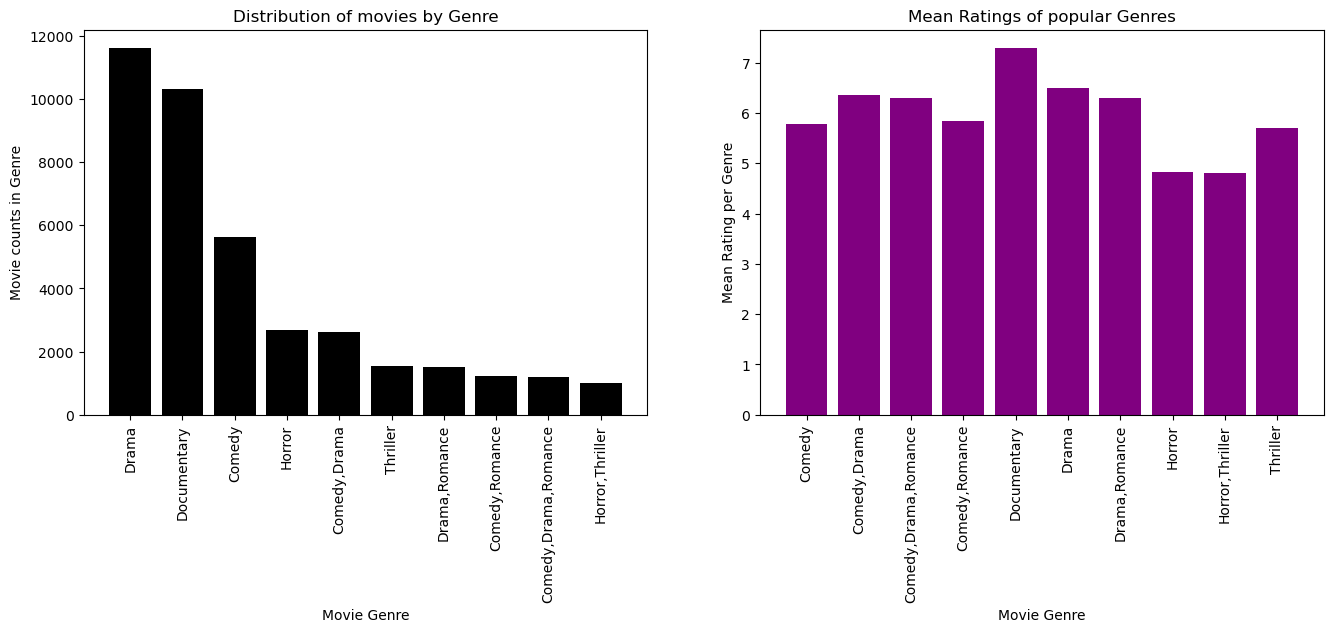

In [251]:
# Creating the plot for the Data above
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(16, 5))
# Plot data
ax1.bar(genres.index, genres.values, color='black')
ax2.bar(popular_df.index, popular_df.values, color='purple')

# Customizing the first subplot appearance
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_xlabel("Movie Genre")
ax1.set_ylabel("Movie counts in Genre")
ax1.set_title("Distribution of movies by Genre")

#Customizing the second subplot appearence
ax2.tick_params(axis="x", labelrotation=90)
ax2.set_xlabel("Movie Genre")
ax2.set_ylabel("Mean Rating per Genre")
ax2.set_title("Mean Ratings of popular Genres");

### Hypothesis Testing

Now i'll be going to conduct a Hypothesis Test in order to investigate the which categories to consider by taking the two most popular genres and comparing the averages of the ratings  

In [192]:
from scipy.stats import ttest_ind

In [193]:
#Parameters
effect_size = 0.5  
alpha = 0.05 
power = 0.80  

# Calculate required sample size
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size, power=power, alpha=alpha)
print(f"Required sample size per group: {sample_size}")

NameError: name 'TTestIndPower' is not defined

In [195]:

# Extracting the ratings for the top 2 genres
documentary_ratings = genre_df[genre_df['genres'] == 'Documentary']['averagerating']
drama_ratings = genre_df[genre_df['genres'] == 'Drama']['averagerating']

# Conduct the t-test
t_stat, p_value = ttest_ind(documentary_ratings, drama_ratings, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # common significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average ratings.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average ratings.")

T-statistic: 50.04363028518206, P-value: 0.0
Reject the null hypothesis: There is a significant difference in average ratings.


### Suggestion 1
The ideal genres to invest in more are drama and documentary, according to our study above, since these two categories have the highest average ratings and the greatest amount of films produced in them by other studios.

## Investigation II: How much to Invest in a Movie Production ?
For this investigation we'll make use of our data stored in the movies_budget variable ?

In [196]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The production budget, domestic gross, worldwide gross, and release date data types are not correctly recorded.


First, let's clean that.

In [197]:
# creating a function that that removes the '$' sign and converts the output to a float
# Create a function that removes the '$' sign and converts the output to a float
def convert(value):
    # Removes the $ and commas
    cleaned_value = value.replace('$', '').replace(',', '')  
    return float(cleaned_value) 

Lets call the function and also clean the data types for the production budget, domestic gross and worlwide gross

In [200]:
#production budget
movie_budgets['production_budget'] = movie_budgets['production_budget'].apply(convert)
# domestic gross
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].apply(convert)
# worldwide gross
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].apply(convert)

Now we can convert  the data types for release_date from integers to be date

In [198]:

movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

previewing it again once more

In [202]:
movie_budgets.info()
movie_budgets.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

The movie_budget data  doesnt ave any null values

### Checking for Duplicates

In [203]:
movie_budgets.duplicated().value_counts()

False    5782
Name: count, dtype: int64

Following this investigation it appears that there are no duplicate values

After this  we can perform further investigation to see if there areany place holder values in the movie column to  confirm if they are all unique to each other

In [204]:
movie_budgets['movie'].unique()

array(['Avatar', 'Pirates of the Caribbean: On Stranger Tides',
       'Dark Phoenix', ..., 'Return to the Land of Wonders',
       'A Plague So Pleasant', 'My Date With Drew'], dtype=object)

After successfully cleaning the the data we can now use it to draw meaningful conclusions from it

For further insight we have to will find the relationship between production_budget and total earnings both locally and worldwide

In [205]:

# Create a new column that adds up thedomestic and worldwide gross earnings
movie_budgets['Total_Earnings'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross'] 
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Total_Earnings
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09


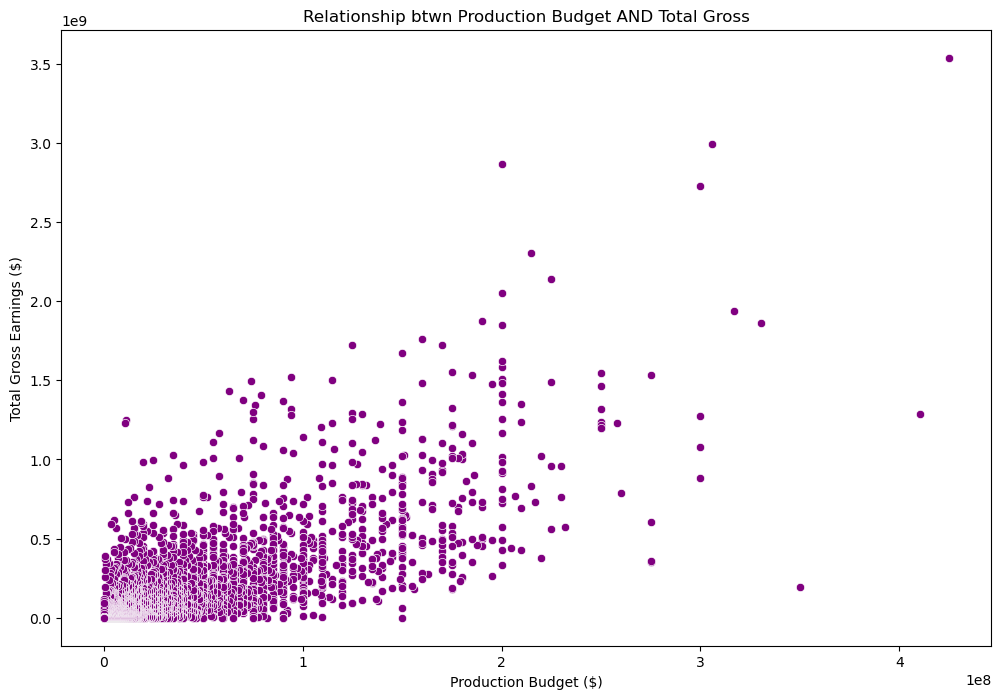

In [228]:
# plotting to see if there is any form of relationship
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot( 
    x=movie_budgets['production_budget'],
    y=movie_budgets["Total_Earnings"], color='purple')

#Customizing the scatterplot appearance
ax.set_title('Relationship btwn Production Budget AND Total Gross')
ax.set_xlabel('Production Budget ($)')
ax.set_ylabel('Total Gross Earnings ($)');

From the scatter plot above we can see there is a roughly upward slopping patern from left to right indicating  that Production Budget and Total gross earnings may have a positive linear relationship.


### Using simple linear regression Model !
Now let us formulate a linear regression model to investigate the strength of the relationship between these two Variables

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean Squared Error: 2.4964034400804496e+16
R^2 Score: 0.5355997835611248


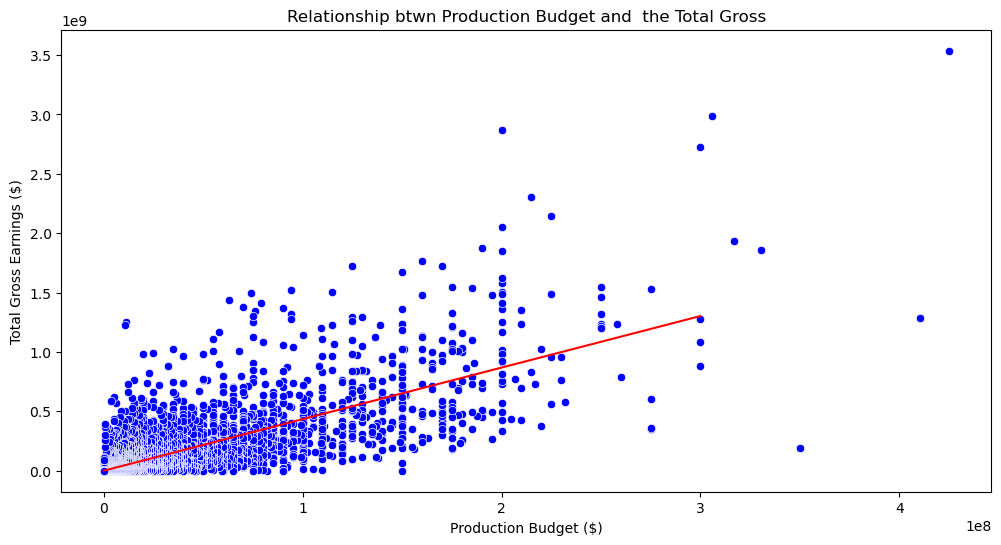

In [226]:
#Importing from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assigning the X and Y variables
X = movie_budgets['production_budget'].values.reshape(-1, 1)
y = movie_budgets['Total_Earnings'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting the data and the regression line
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=movie_budgets['production_budget'], y=movie_budgets['Total_Earnings'], color='blue', ax=ax)
sns.lineplot(x=X_test.flatten(), y=y_pred, color='red', ax=ax)

# Customizing the plot
ax.set_title('Relationship btwn Production Budget and  the Total Gross')
ax.set_xlabel('Production Budget ($)')
ax.set_ylabel('Total Gross Earnings ($)')

# Evaluating the model by finding the mse and the r2 scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.show()

### What does this model tell us ?



The Coefficient of Determination with the value of 0.53559978 suggestthat the model explains about 54% of tha variance which indicates moderate levels of explanatory power

In this case, the MSE is quite large (2.4964034400804496e+16). Since the values are squared, this large number suggests that there are significant differences between the actual and predicted values

This suggests a weak positive covariance

The model has a moderate fit, as indicated by the R² score. While it explains a significant portion of the variance,further investigation may be needed but we've already established a positive linear relationship



### Checking for assumptions
* linearity
* Normality
* Independence
* Homoskedasticity

### Linearity

Ideally the previous two plots have already proven the assumption of linearity , the model suggests a positive linear relationship

### Normality
When the errors are normal, they will follow the diagonal line closely. Here we see some significant divergences, especially on the tails of the line.

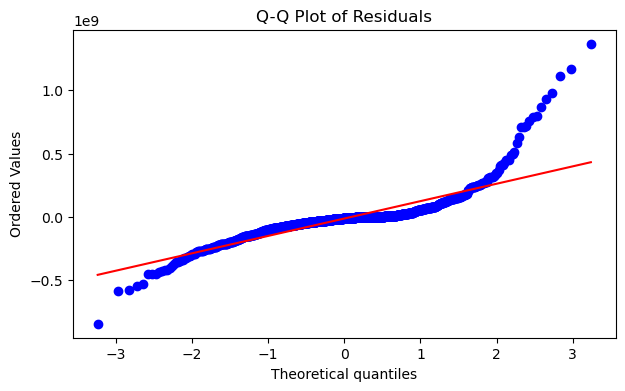

In [220]:
# Checking for normality using q-q plots
import scipy.stats as stats
plt.figure(figsize=(7, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


### Independence
The Patterns or systematic structure suggest some potential autocorrelation.

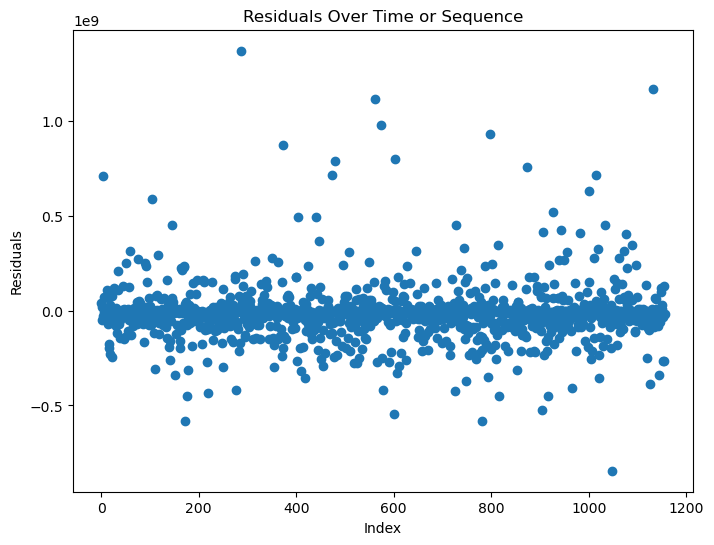

In [249]:
plt.figure(figsize=(8, 6))
plt.plot(residuals, marker='o', linestyle='None')
plt.title('Residuals Over Time or Sequence')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

### Homoskedascity

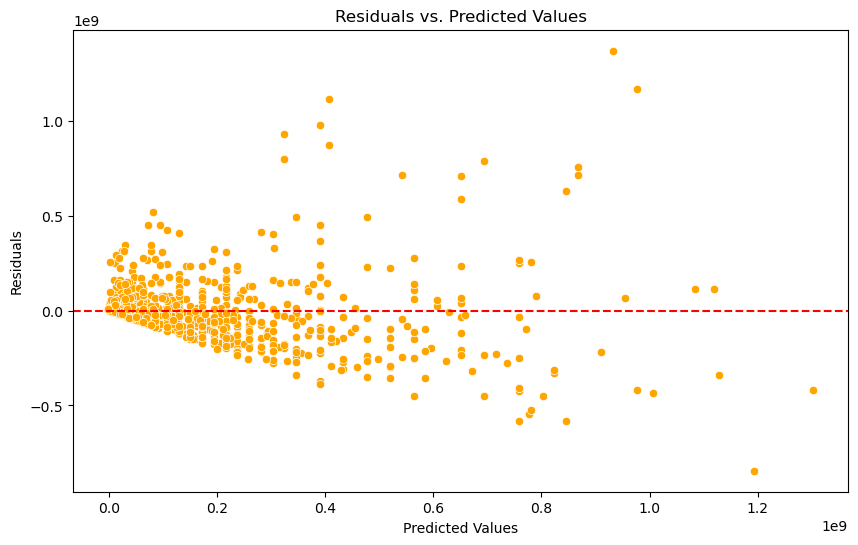

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting values
y_pred = model.predict(X_test)

# Calculating residuals
residuals = y_test - y_pred
# Plotting residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Suggestion 2

We can infer from the illustration above  that a movie's overall gross earnings increase with the amount invested in its production.

Bandersnatch studios should put more money into the film's production if they want to see a larger return on their investment.Our data indicates that investing an average of $350,000,000 in a movie's production can potentially provide a total revenue of over $1 billion, making it a wise investment for the corporation.

### Investigation III : What is the relationship between a Movie Language and the popularity with Audience ?

In this investigation we will now use the dataframe movie_data to conduct our analysis

In [231]:
#previewing the Data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


#### Checking for Duplicates

In [232]:
movie_data.duplicated().value_counts()

False    25497
True      1020
Name: count, dtype: int64

In [ ]:
movie_data = movie_data.drop_duplicates()

movie_data.info()


We then  extract the top 10 languages and clean their names to have universally known names and store them in a new variable called most_pop languages

In [236]:
most_pop = movie_data['original_language'].value_counts().head(10)

most_pop

original_language
en    22384
fr      483
es      439
ru      295
ja      244
de      231
zh      174
hi      171
it      119
pt       95
Name: count, dtype: int64


We can see our top languages are shown in abreviations e.g 'en', 'fr' etc. I will  now convert the languages to familiar names

In [237]:
name_language ={
     'en': 'English',
    'fr': 'French',
    'es': 'Spanish',
    'ru': 'Russian',
    'ja': 'Japanese',
    'de': 'German',
    'zh': 'Chinese',
    'hi': 'Hindi',
    'it': 'Italian',
    'pt': 'Portuguese'
}

In [238]:
movie_data['original_language'] = movie_data['original_language'].replace(name_language)

# repeat the code execution to capture the right names
top_languages = movie_data['original_language'].value_counts().head(10)

top_languages

original_language
English       22384
French          483
Spanish         439
Russian         295
Japanese        244
German          231
Chinese         174
Hindi           171
Italian         119
Portuguese       95
Name: count, dtype: int64

   In order to fully understand the best language to produce a movie I  will create two visualizations:

First one shows the languages with the most movies produced in it. From the count above we can register that English is already the most popular language, so we'll have another chart excluding English

Second one shows the language with the best average ratings from the audiance

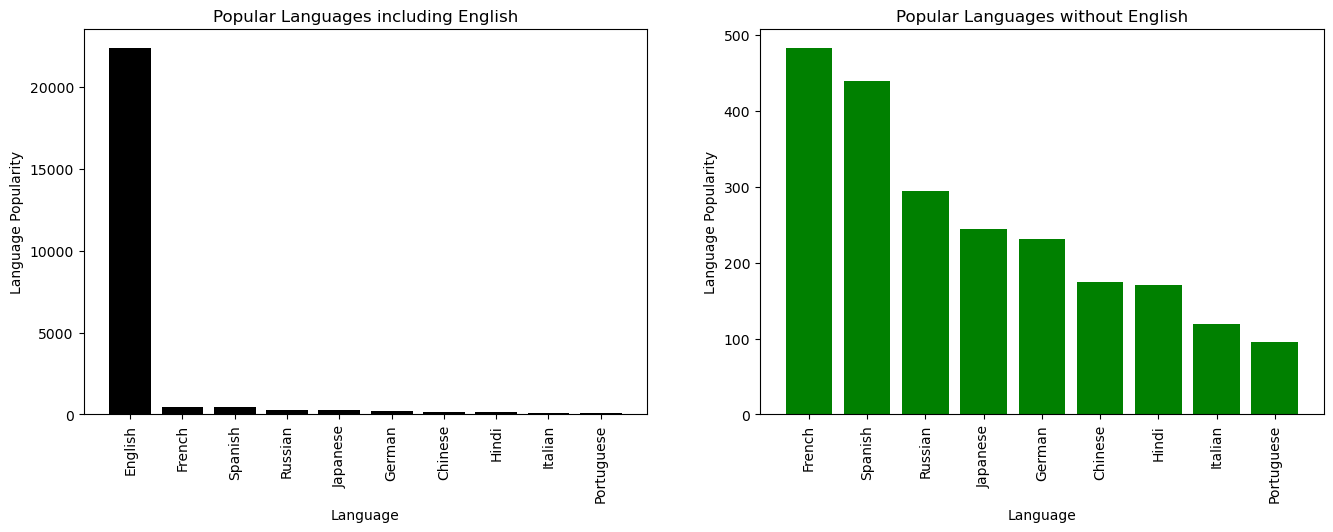

In [241]:
# 1st Plot to show Popular Language
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Plot data
ax1.bar(top_languages.index, top_languages.values, color='black')
ax2.bar(top_languages.index[1:], top_languages.values[1:], color='green')

# Customizing the first subplot appearance
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_xlabel("Language")
ax1.set_ylabel("Language Popularity")
ax1.set_title("Popular Languages including English")

#Customizing the second subplot appearence
ax2.tick_params(axis="x", labelrotation=90)
ax2.set_xlabel("Language")
ax2.set_ylabel("Language Popularity")
ax2.set_title("Popular Languages without English");

The above visualisation on the left makes it very evident that the majority of studios produce their films in English, with French and Spanish following closely behind.

The range between the different movie languages can now be seen clearly in the second plot.

According to the study in question, it makes sense to make an English-language film because there is already a sizable audience for it. The only issue is that there is fierce competition. Japanese, French, Spanish, and Russian are further appropriate languages. The best languages for Bandersnatch studios to work with will be these five.

Let's investigate how these languages connect with their audience in more detail.

In [245]:
# list to store the names of the most popular genres
popular_languages = [language for language in top_languages.index]

#creating a dataframe to store the mean averagerating for the popular_genres
languages = movie_data[movie_data['original_language'].isin(popular_languages)].groupby('original_language')['popularity'].mean()

languages

original_language
Chinese       3.679747
English       2.998454
French        4.188834
German        2.897727
Hindi         3.522497
Italian       2.999345
Japanese      5.439041
Portuguese    2.373179
Russian       2.362264
Spanish       2.694150
Name: popularity, dtype: float64

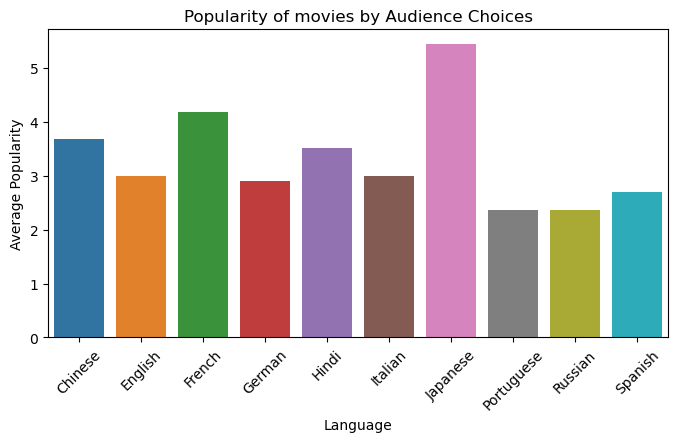

In [246]:
#2nd Plot to show language popularity by audiance pick
plt.figure(figsize=(8, 4))

sns.barplot(x=languages.index, y=languages.values)

# Customize titles and axis labels
plt.title('Popularity of movies by Audience Choices')
plt.xlabel('Language')
plt.ylabel('Average Popularity')

# Rotate x-axis labels if needed
plt.xticks(rotation=45);

# Show plot
plt.show()

Based on average audience votes, the movie languages most in demand are displayed in the bar graph above.

The audience appears to enjoy Japanese films the most, followed by French, Chinese, and Hindi films, and finally English films. As all of these languages are included in our list of the top 5 most popular languages in which to produce a film, and because of their high average ratings, we may conclude that all of these languages—aside from Hindi and Chinese—seem to be the most popular. other factors may affect this rating of average poupularity such as the number of films produced in each language 

### Hypothesis test(scenario:)
Null Hypothesis (H₀):<br>
The language used in the production of movies has no effect on the popularity of the movie or language does not significantly influence movie popularity.

Alternative Hypothesis (H₁): <br> 
 The language used in the production of movies has a significant effect on the popularity of the movie or language significantly influences movie popularity.


#### Choice of the Test to use
Given the structure of the Dataset
we have:
* original_language as a categorical variable (with values like Chinese, English, French, etc.)
* Popularity which is indicated as the datatype floats (continuous variable)

The most suitable test to determine if there are significant differences in popularity across the different languages is ANOVA (Analysis of Variance).

In [248]:
from scipy.stats import f_oneway

# Grouping the data by language
groups = movie_data.groupby('original_language')['popularity']

# Preparing the data for the ANOVA tests. 
grouped_data = [group.values for name, group in groups]

# Perform ANOVA
anova = f_oneway(*grouped_data)

print(f'F-Statistic: {anova.statistic}')
print(f'P-Value: {anova.pvalue}')


F-Statistic: 2.8382420741877303
P-Value: 4.725480147066855e-15


Based on the test:<br>
We **Reject the Null Hypothesis (H₀):** The null hypothesis is rejected since the p-value is considerably less than 0.05. This indicates that there is enough evidence to support the theory that the language employed in film creation significantly influences the films' level of popularity.

Significant Difference:<br>
 According to the findings, there are notable variations in the popularity of the various languages that are statistically significant.

### Suggestion 3
Bandersnatch studios should majorly focus on producing movies in the following languages :
* English
* Japanese 
* French

English dominates in the language of movie creation, showing its widespread use in the industry, based on an analysis of movie popularity across several languages. But even with a large number of English-language films, Japanese films have the highest average rating, making them stand out. This suggests that, on average, Japanese films receive more positive reviews or are more well-liked by viewers, exposing a disparity between the number of films produced and their level of popularity. This result highlights that other elements that contribute to a film's success and appeal also have an impact on its quality and reception, regardless of the language used during production

## OVERALL RECOMMENDATIONS
After doing our analysis based on the data we had and focusing on a few aspects, to ensure high return on its investment when creating a studio and smooth transition into this new venture Bandersnatch studios can make use of this analysis and do the following:

* Produce movies in the Drama and Documentary Genre as they proved to be the most popular
* Put an investment of about $350,000,000 or more in the production of a movie
* Produce movies in English, French and Japanese languages